In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [48]:
df = pd.read_csv('all_data.csv')
df.rename(columns={'Life expectancy at birth (years)': 'LifeEx'}, inplace=True)
print(df.head())
print(df.dtypes)

  Country  Year  LifeEx           GDP
0   Chile  2000    77.3  7.786093e+10
1   Chile  2001    77.3  7.097992e+10
2   Chile  2002    77.8  6.973681e+10
3   Chile  2003    77.9  7.564346e+10
4   Chile  2004    78.0  9.921039e+10
Country     object
Year         int64
LifeEx     float64
GDP        float64
dtype: object


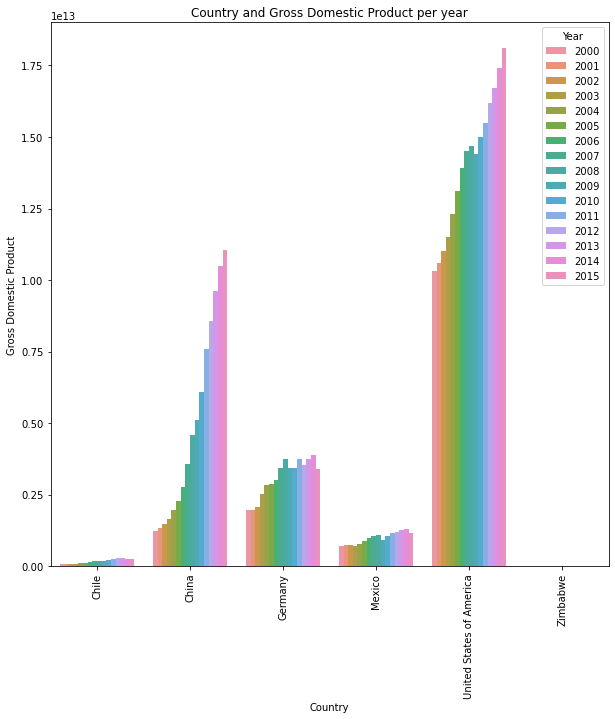

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.barplot(data=df, x='Country', y='GDP', hue='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Country')
plt.ylabel('Gross Domestic Product')
plt.title('Country and Gross Domestic Product per year')
plt.show()
plt.clf()

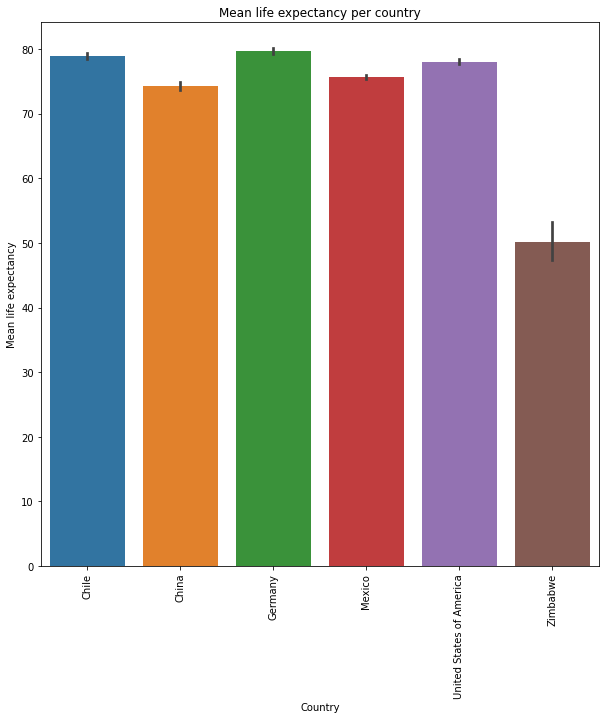

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.barplot(data=df, x='Country', y='LifeEx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean life expectancy')
plt.title('Mean life expectancy per country')
plt.show()
plt.clf()

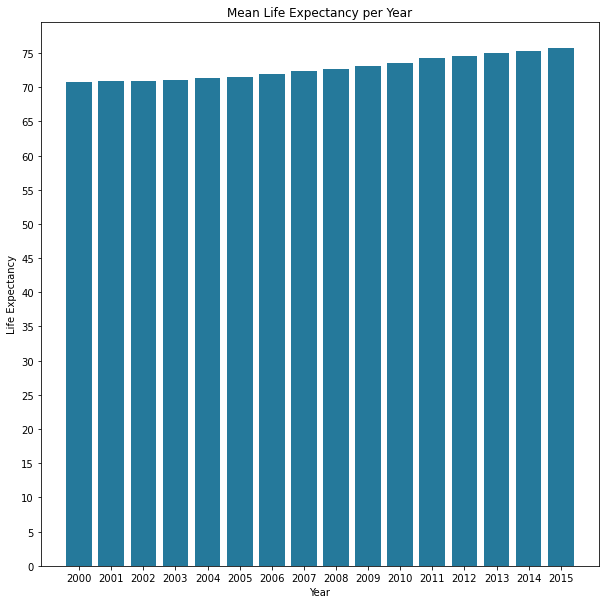

<Figure size 432x288 with 0 Axes>

In [51]:
y = df.groupby('Year').LifeEx.mean()
xlab = df.Year.unique()

plt.figure(figsize=(10,10))
ax = plt.subplot()
plt.bar(range(len(y)), y, color='#25799B')
ax.set_xticks(range(len(xlab)))
ax.set_xticklabels(xlab)
ax.set_yticks(range(0,80,5))
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Mean Life Expectancy per Year')
plt.show()
plt.clf()

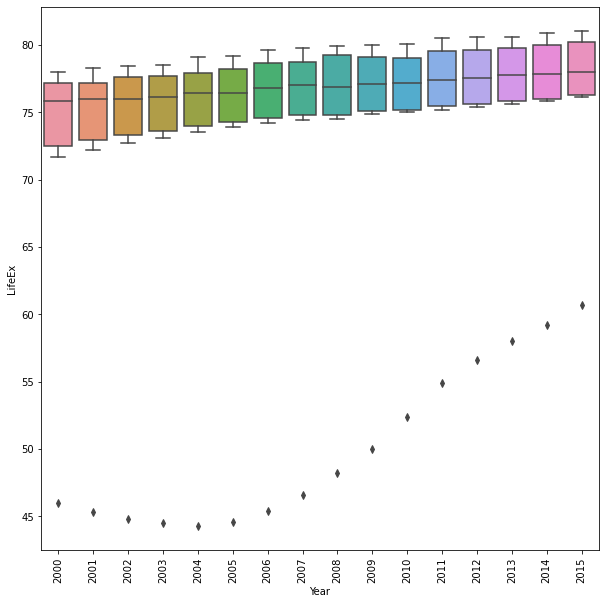

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.boxplot(data=df, x='Year', y='LifeEx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
plt.clf()

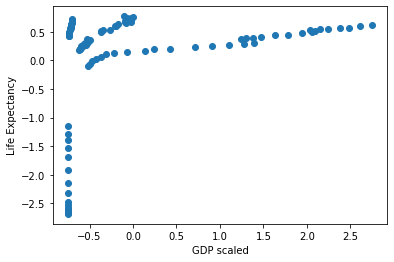

[[2.70146436e+25 1.90386943e+13]
 [1.90386943e+13 1.13910417e+02]]
0.34320674844915594


In [53]:
scaler = StandardScaler()
y_val = scaler.fit_transform(np.array(df.LifeEx).reshape(-1,1))
x_val = scaler.fit_transform(np.array(df.GDP).reshape(-1,1))

plt.scatter(x=x_val, y=y_val)
plt.xlabel('GDP scaled')
plt.ylabel('Life Expectancy')
plt.show()

print(np.cov(df.GDP, df.LifeEx))
correlation, p_val = pearsonr(df.GDP, df.LifeEx)
print(correlation)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


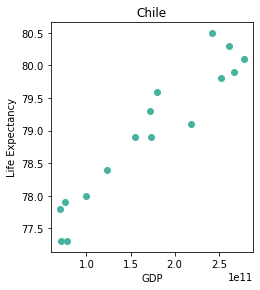

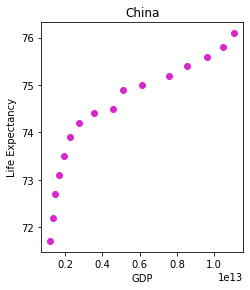

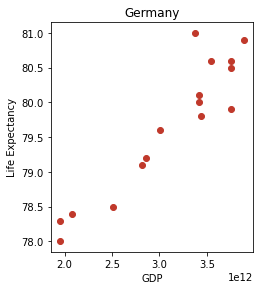

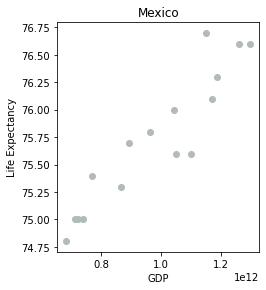

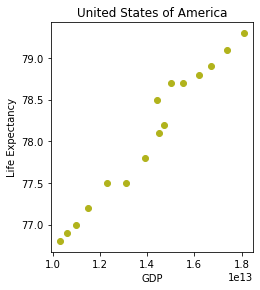

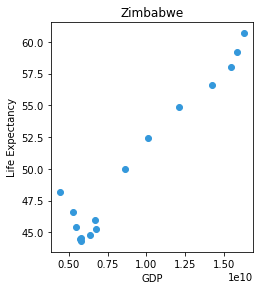

In [93]:
un_coun = df.Country.unique()
print(un_coun)
col = ['#45B39D', '#D728CF', '#C0392B', '#B2BABB', '#B1B31C', '#3498DB']
for i in range(len(un_coun)):
    x_val = df[df.Country == un_coun[i]].GDP
    y_val = df[df.Country == un_coun[i]].LifeEx
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,i+1)
    plt.scatter(x_val, y_val, color=col[i])
    plt.title(un_coun[i])
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.subplots_adjust(bottom=0.02, hspace=0.7, wspace=0.7, right=0.95)
plt.show()